## 1. Autoencoder
Build and fit a convolutional autoencoder for the CIFAR10 Dataset. The components of this network will be many of the same pieces we’ve used
with convolutional classification networks: Conv2D, MaxPooling, and so on.
The encoder part of the network should run the input image through a few
convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
from keras.datasets import cifar10
from keras.layers import Input
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tfkl = tfk.layers

In [70]:
# import data and label names
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 2s 0us/step


In [71]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [72]:
x_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'frog')

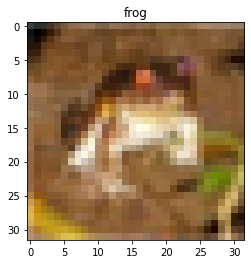

In [73]:
# Visualize first image and its label
plt.imshow(x_train[0])
plt.title(labels[int(y_train[0])])

In [77]:
input_img = tfk.Input(shape=(32, 32, 3))

x = tfkl.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tfkl.BatchNormalization()(x)
x = tfkl.MaxPooling2D((2, 2), padding='same')(x)
x = tfkl.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.MaxPooling2D((2, 2), padding='same')(x)
x = tfkl.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tfkl.BatchNormalization()(x)
encoded = tfkl.MaxPooling2D((2, 2), padding='same')(x)


x = tfkl.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tfkl.BatchNormalization()(x)
x = tfkl.UpSampling2D((2, 2))(x)
x = tfkl.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.UpSampling2D((2, 2))(x)
x = tfkl.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.UpSampling2D((2, 2))(x)
x = tfkl.BatchNormalization()(x)
decoded = tfkl.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = tfk.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)         

In [78]:
results = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
391/391 [==============================] - 406s 1s/step - loss: 1.5488 - accuracy: 0.6616 - val_loss: 1.5636 - val_accuracy: 0.5705
Epoch 2/10
391/391 [==============================] - 406s 1s/step - loss: 1.5434 - accuracy: 0.7363 - val_loss: 1.5540 - val_accuracy: 0.7549
Epoch 3/10
391/391 [==============================] - 404s 1s/step - loss: 1.5426 - accuracy: 0.7527 - val_loss: 1.5543 - val_accuracy: 0.7024
Epoch 4/10
391/391 [==============================] - 406s 1s/step - loss: 1.5420 - accuracy: 0.7671 - val_loss: 1.5525 - val_accuracy: 0.7697
Epoch 5/10
391/391 [==============================] - 406s 1s/step - loss: 1.5417 - accuracy: 0.7749 - val_loss: 1.5524 - val_accuracy: 0.7925
Epoch 6/10
391/391 [==============================] - 406s 1s/step - loss: 1.5414 - accuracy: 0.7809 - val_loss: 1.5521 - val_accuracy: 0.8023
Epoch 7/10
391/391 [==============================] - 407s 1s/step - loss: 1.5413 - accuracy: 0.7847 - val_loss: 1.5520 - val_accuracy: 0.7730

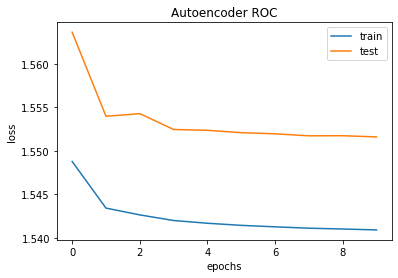

In [79]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Autoencoder ROC')
plt.show()

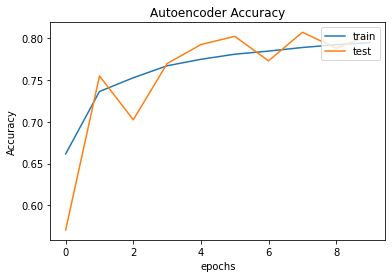

In [80]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Autoencoder Accuracy')
plt.show()

In [81]:
reconstruction = autoencoder.predict(x_train)

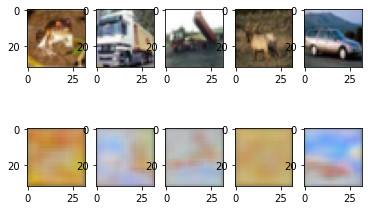

In [82]:
n = 5
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_train[i].reshape(32, 32, 3))
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstruction[i].reshape(32, 32, 3))
plt.show()

## 2. Image Classification
### 2.1 Deep CNN
Build a deep CNN to classify the images. Provide a brief description of the
architectural choices you’ve made: kernel sizes, strides, padding, network
depth.Train your network end-to-end. Report on your model’s performance
on the training set and test set

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = tfk.Sequential()

# block 1
model.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=(1, 1), 
                      padding="same", activation='relu', input_shape=(32, 32, 3)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))
# block 2
model.add(tfkl.Conv2D(filters = 16, kernel_size=3, strides=(1, 1), 
                      padding="same", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))
# block 3
model.add(tfkl.Conv2D(filters = 8, kernel_size=3, strides=(1, 1), 
                      padding="same", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))
# flatten
model.add(tfkl.Flatten())
model.add(tfkl.Dense(32, activation='relu'))
model.add(tfkl.Dropout(0.2))
model.add(tfkl.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 8, 8, 8)          

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)

results2 = model.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 58s 147ms/step - loss: 2.0198 - accuracy: 0.2419 - val_loss: 1.7577 - val_accuracy: 0.3781
Epoch 2/10
391/391 [==============================] - 58s 148ms/step - loss: 1.7285 - accuracy: 0.3591 - val_loss: 1.5773 - val_accuracy: 0.4285
Epoch 3/10
391/391 [==============================] - 57s 147ms/step - loss: 1.6204 - accuracy: 0.4055 - val_loss: 1.4970 - val_accuracy: 0.4607
Epoch 4/10
391/391 [==============================] - 58s 147ms/step - loss: 1.5549 - accuracy: 0.4293 - val_loss: 1.4032 - val_accuracy: 0.4926
Epoch 5/10
391/391 [==============================] - 58s 149ms/step - loss: 1.5179 - accuracy: 0.4411 - val_loss: 1.3631 - val_accuracy: 0.5179
Epoch 6/10
391/391 [==============================] - 57s 147ms/step - loss: 1.4746 - accuracy: 0.4562 - val_loss: 1.3280 - val_accuracy: 0.5234
Epoch 7/10
391/391 [==============================] - 57s 146ms/step - loss: 1.4424 - accuracy: 0.4716 - val_loss: 1.3163 - val_ac

In [ ]:
acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.2660 - accuracy: 0.5478


In [ ]:
print('The testing accuracy score is', round(acc[1], 4))

The testing accuracy score is 0.5478


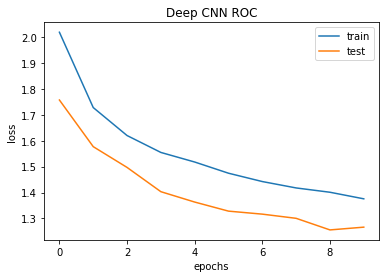

In [ ]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Deep CNN ROC')
plt.show()

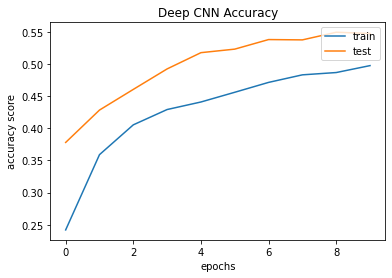

In [ ]:
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy score')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Deep CNN Accuracy')
plt.show()

### 2.2 Transfer Learning
Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights
should be fixed. You can use whichever pre-trained backbone you like (ResNet,
VGG, etc). Report on your model’s performance on the training set and test
set.

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
model = tfk.Sequential()
model.add(conv_base)

for l in model.layers:
  l.trainable = False

model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics = "accuracy"
)

results3 = model.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 614s 2s/step - loss: 1.6870 - accuracy: 0.4337 - val_loss: 1.4764 - val_accuracy: 0.4980
Epoch 2/10
391/391 [==============================] - 615s 2s/step - loss: 1.4022 - accuracy: 0.5267 - val_loss: 1.3766 - val_accuracy: 0.5289
Epoch 3/10
391/391 [==============================] - 615s 2s/step - loss: 1.3270 - accuracy: 0.5493 - val_loss: 1.3325 - val_accuracy: 0.5413
Epoch 4/10
391/391 [==============================] - 617s 2s/step - loss: 1.2853 - accuracy: 0.5630 - val_loss: 1.3048 - val_accuracy: 0.5462
Epoch 5/10
391/391 [==============================] - 615s 2s/step - loss: 1.2569 - accuracy: 0.5732 - val_loss: 1.2795 - val_accuracy: 0.5596
Epoch 6/10
391/391 [==============================] - 615s 2s/step - loss: 1.2366 - accuracy: 0.5781 - val_loss: 1.2649 - val_accuracy: 0.5638
Epoch 7/10
391/391 [==============================] - 615s 2s/step - loss: 1.2209 - accuracy: 0.5831 - val_loss: 1.2529 - val_accuracy: 0.5669

In [ ]:
acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 108s 344ms/step - loss: 1.2291 - accuracy: 0.5762


In [ ]:
print('The testing accuracy score is', round(acc[1], 4))

The testing accuracy score is 0.5762


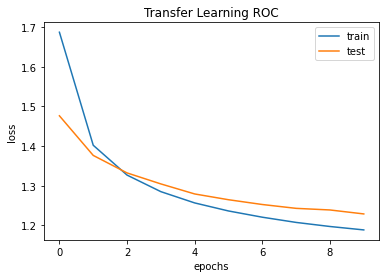

In [ ]:
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Transfer Learning ROC')
plt.show()

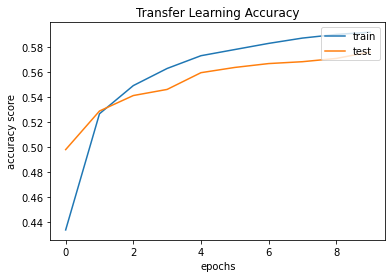

In [ ]:
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy score')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Transfer Learning Accuracy')
plt.show()

## 3. Text Classification

### 3.1 RNN
Build and train a Recurrent Neural Network to solve this text classification
task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).


In [7]:
from google.colab import files
uploaded = files.upload()

Saving SPAM_detection.csv to SPAM_detection.csv


In [9]:
# spam dataset
data = pd.read_csv('SPAM_detection.csv', sep=',')
data.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
message = np.asarray(data['Message'])
label = np.asarray(data['category_val'])

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(message)
sequence = tokenizer.texts_to_sequences(message)
X = pad_sequences(sequence, padding='post')

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, label, test_size=0.2,
                                                    random_state=10)

In [45]:
x_train.shape

(4457, 189)

In [65]:
lstm = tfk.Sequential()
lstm.add(tfkl.Embedding(len(tokenizer.word_index)+1, 16))
lstm.add(tfkl.LSTM(16, return_sequences=True))
lstm.add(tfkl.Dense(8, activation='relu'))
lstm.add(tfkl.Dropout(0.2))
lstm.add(tfkl.Dense(1, activation='sigmoid'))


lstm.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])
lstm.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 16)          144080    
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 16)          2112      
_________________________________________________________________
dense_13 (Dense)             (None, None, 8)           136       
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 8)           0         
_________________________________________________________________
dense_14 (Dense)             (None, None, 1)           9         
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
_________________________________________________________________


In [66]:
results4 = lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
140/140 [==============================] - 11s 75ms/step - loss: 0.4387 - accuracy: 0.8628 - val_loss: 0.3851 - val_accuracy: 0.8728
Epoch 2/10
140/140 [==============================] - 10s 75ms/step - loss: 0.3369 - accuracy: 0.8770 - val_loss: 0.1973 - val_accuracy: 0.9086
Epoch 3/10
140/140 [==============================] - 12s 87ms/step - loss: 0.1669 - accuracy: 0.9642 - val_loss: 0.1278 - val_accuracy: 0.9682
Epoch 4/10
140/140 [==============================] - 12s 84ms/step - loss: 0.1044 - accuracy: 0.9805 - val_loss: 0.1147 - val_accuracy: 0.9747
Epoch 5/10
140/140 [==============================] - 11s 80ms/step - loss: 0.0799 - accuracy: 0.9865 - val_loss: 0.1022 - val_accuracy: 0.9791
Epoch 6/10
140/140 [==============================] - 11s 75ms/step - loss: 0.0666 - accuracy: 0.9890 - val_loss: 0.0836 - val_accuracy: 0.9830
Epoch 7/10
140/140 [==============================] - 10s 74ms/step - loss: 0.0575 - accuracy: 0.9908 - val_loss: 0.0793 - val_accuracy:

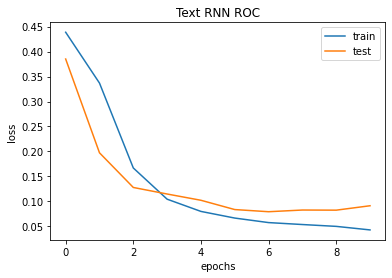

In [67]:
plt.plot(results4.history['loss'])
plt.plot(results4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Text RNN ROC')
plt.show()

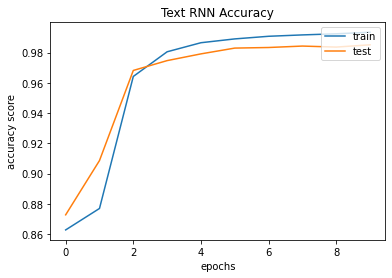

In [68]:
plt.plot(results4.history['accuracy'])
plt.plot(results4.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy score')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Text RNN Accuracy')
plt.show()

### 3.2 CNN
Build and train a 1D CNN for this text classification task

In [56]:
cnn = tfk.Sequential()
cnn.add(tfkl.Embedding(len(tokenizer.word_index)+1, 16))
cnn.add(tfkl.Conv1D(filters = 32, kernel_size=2, activation='relu'))
cnn.add(tfkl.MaxPool1D(pool_size=2))
cnn.add(tfkl.Dropout(0.2))
cnn.add(tfkl.Conv1D(filters = 16, kernel_size=2, activation='relu'))
cnn.add(tfkl.MaxPool1D(pool_size=2))
cnn.add(tfkl.Dropout(0.2))
cnn.add(tfkl.Conv1D(filters = 8, kernel_size=2, activation='relu'))
cnn.add(tfkl.MaxPool1D(pool_size=2))
cnn.add(tfkl.Dropout(0.2))

cnn.add(tfkl.GlobalMaxPool1D())
cnn.add(tfkl.Dense(1, activation='sigmoid'))
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 16)          144080    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          1056      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1040      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 16)        

In [58]:
cnn.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])
results5 = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
140/140 [==============================] - 2s 14ms/step - loss: 0.4293 - accuracy: 0.8620 - val_loss: 0.4268 - val_accuracy: 0.8717
Epoch 2/10
140/140 [==============================] - 2s 13ms/step - loss: 0.3075 - accuracy: 0.8775 - val_loss: 0.3140 - val_accuracy: 0.9668
Epoch 3/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0959 - accuracy: 0.9702 - val_loss: 0.1858 - val_accuracy: 0.9596
Epoch 4/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0556 - accuracy: 0.9838 - val_loss: 0.1121 - val_accuracy: 0.9785
Epoch 5/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0477 - accuracy: 0.9868 - val_loss: 0.1141 - val_accuracy: 0.9713
Epoch 6/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0391 - accuracy: 0.9897 - val_loss: 0.0910 - val_accuracy: 0.9767
Epoch 7/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0249 - accuracy: 0.9933 - val_loss: 0.0880 - val_accuracy: 0.9740

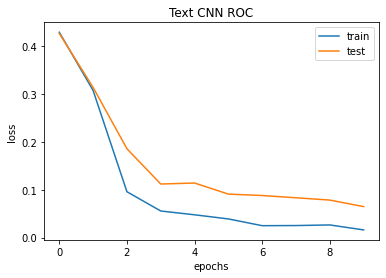

In [59]:
plt.plot(results5.history['loss'])
plt.plot(results5.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Text CNN ROC')
plt.show()

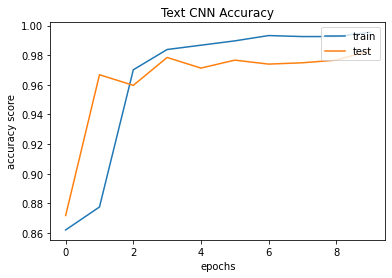

In [62]:
plt.plot(results5.history['accuracy'])
plt.plot(results5.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy score')
plt.legend(['train', 'test'], loc = 'upper right')
plt.title('Text CNN Accuracy')
plt.show()

### 3.3
Be sure to directly compare your two methods with an ROC curve or similar
validation method. Don’t forget to create a train-test split.

See sections 3.1 and 3.2